# Problem Defination 
Data Discretization and data Normalization. Use suitable dataset (eg. heart dataset)
Perform following operations:
Find standard deviation, variance of every numerical attribute.

Find covariance and perform Correlation analysis using Correlation coefficient.

How many independent features are present in the given dataset?

Can we identify unwanted features?

Perform the data discretization using equi frequency binning method on age attribute

Normalize trestbps, chol and thalach attributes (considering above dataset) using min-max normalization, Z-score normalization, and decimal scaling normalization.

In [2]:
import pandas as pd

In [3]:
# Load the dataset 
df = pd.read_csv("heart.csv")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# check for null values 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# there is no null values in the heart dataset 
# now check for datatype of each column 
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

[]

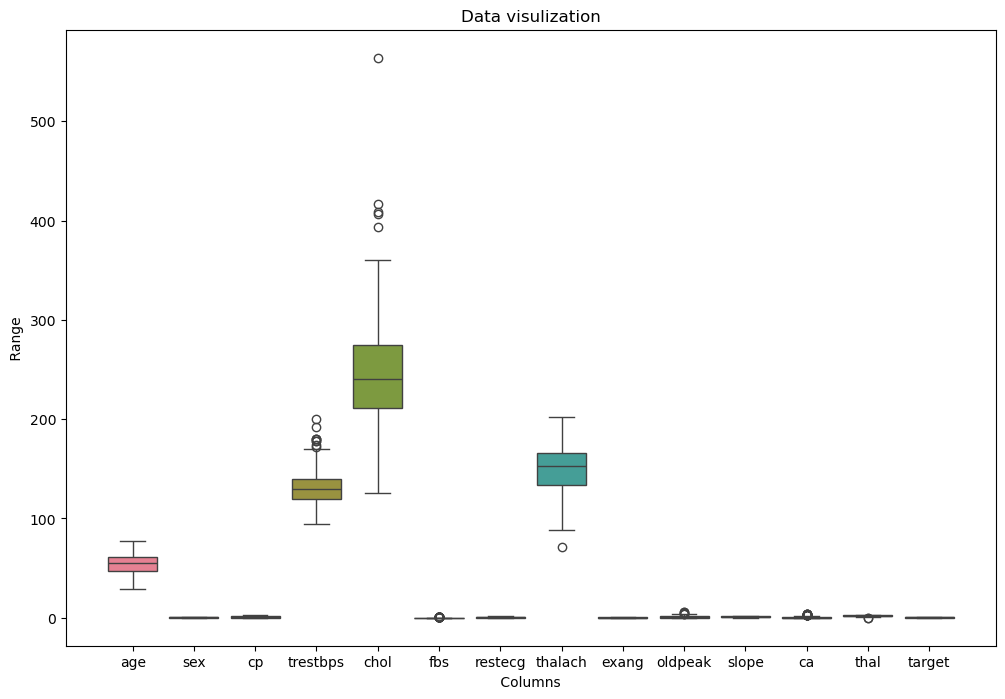

In [12]:
# all columns havimg numeric data 
# check for outlier for that visulize the box plot 
import matplotlib.pyplot as plt
import seaborn as sns

# print the box plot 
plt.figure(figsize=(12,8))
sns.boxplot(df)
plt.title("Data visulization")
plt.xlabel(" Columns ")
plt.ylabel(" Range ")
plt.plot()

In [14]:
# there is an outliers in the dataset so we need to remove those outliers 
# to remove outliers here we are using the IQR Technique 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

df1 = df[(df >= lower) & (df <= high)]

df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,NaN,0,150.0,0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0.0,1,123.0,1,0.2,1,0.0,3.0,0
299,45,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,0.0,3.0,0
300,68,1,0,144.0,193.0,NaN,1,141.0,0,3.4,1,2.0,3.0,0
301,57,1,0,130.0,131.0,0.0,1,115.0,1,1.2,1,1.0,3.0,0


In [16]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
df1.isnull().sum()

age          0
sex          0
cp           0
trestbps     9
chol         5
fbs         45
restecg      0
thalach      1
exang        0
oldpeak      5
slope        0
ca          25
thal         2
target       0
dtype: int64

In [22]:
# after apllying the iqr it seems like there is null values are appeare so now we need to handle those values
column = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
for col in column:
    df1[col] = df1[col].fillna(df1[col].median())
    

In [24]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [28]:
df1.shape

(303, 14)

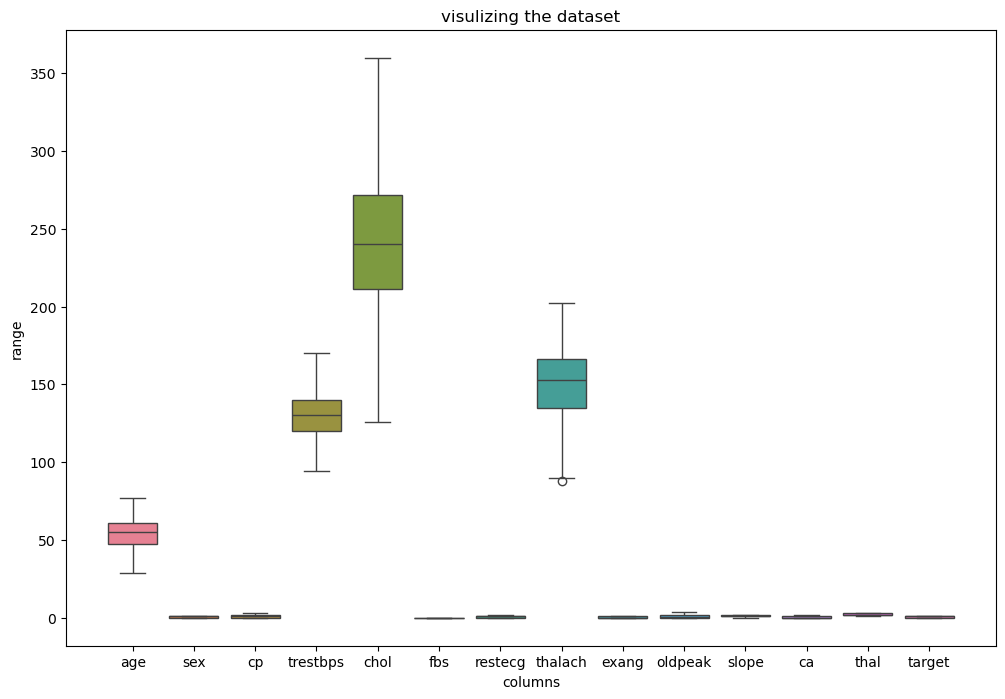

In [30]:
# there is 14 columns and 303 is rows 
# we successfully handle the null values in filterd dataset now again check for outliers 
plt.figure(figsize=(12,8))
sns.boxplot(df1)
plt.title("visulizing the dataset")
plt.xlabel("columns")
plt.ylabel('range')
plt.plot()
plt.show()

In [32]:
# so now we can see that we successfully removed the outliers 
# now our dataset is ready to perform different operation 


# 1. Find standared deviation operation on given dataset suitable programming language.

In [35]:
# using the std() function 
for col in column:
    stand = df1[col].std()
    print(f"{col} : {stand}")

age : 9.082100989837858
sex : 0.4660108233396251
cp : 1.0320524894832992
trestbps : 15.13027452131145
chol : 44.72150714499828
fbs : 0.0
restecg : 0.525859596359298
thalach : 22.452815668334125
exang : 0.46979446452231716
oldpeak : 1.0416555482107213
slope : 0.6162261453459631
ca : 0.7080103139655947
thal : 0.5830198426374995
target : 0.4988347841643926


In [37]:
# calculating mean for each column 
for col in column:
    mean_val = df1[col].sum()/len(df1[col])
    print(f"{col} : {mean_val}")

age : 54.366336633663366
sex : 0.6831683168316832
cp : 0.966996699669967
trestbps : 130.0924092409241
chol : 242.993399339934
fbs : 0.0
restecg : 0.528052805280528
thalach : 149.91749174917493
exang : 0.32673267326732675
oldpeak : 0.969141914191419
slope : 1.3993399339933994
ca : 0.46534653465346537
thal : 2.3267326732673266
target : 0.5445544554455446


In [39]:
# calculating mean using mean() function 
for col in column:
    mean1 = df1[col].mean()
    print(f"{col} : {mean1}")

age : 54.366336633663366
sex : 0.6831683168316832
cp : 0.966996699669967
trestbps : 130.0924092409241
chol : 242.993399339934
fbs : 0.0
restecg : 0.528052805280528
thalach : 149.91749174917493
exang : 0.32673267326732675
oldpeak : 0.969141914191419
slope : 1.3993399339933994
ca : 0.46534653465346537
thal : 2.3267326732673266
target : 0.5445544554455446


In [41]:
# by observing both the mean result we conclude that bithe result are same 

In [61]:
# here we are calculating variance
for col in column:
    mean_val = df1[col].sum() / len(df1[col])  # Compute mean
    upper_var = [(x - mean_val) ** 2 for x in df1[col]]  # Compute squared differences
    variance = sum(upper_var) / len(df1[col])  # Compute variance
 
    print(f"{col}: {variance}")


age: 82.21233212430155
sex: 0.21644936770904932
cp: 1.0616170527943893
trestbps: 228.16967835397494
chol: 1993.4124976854123
fbs: 0.0
restecg: 0.275615680379919
thalach: 502.4651395832656
exang: 0.21997843348691362
oldpeak: 1.0814652702894054
slope: 0.37848141249768674
ca: 0.499624219847727
thal: 0.33879031467503146
target: 0.2480149004999522


In [63]:
# now calculate the variance using var()

var1 = df1.var(ddof=0)
print("variance",var1)

variance age           82.212332
sex            0.216449
cp             1.061617
trestbps     228.169678
chol        1993.412498
fbs            0.000000
restecg        0.275616
thalach      502.465140
exang          0.219978
oldpeak        1.081465
slope          0.378481
ca             0.499624
thal           0.338790
target         0.248015
dtype: float64


In [65]:
# By observing both th result we see that calculation of variance by manually or by using function both are same 

In [173]:
# now we are going to calculate standerd deviation manually 
import numpy as np 

for col in df1.columns:
    mean_val = sum(df1[col]) / len(df1)  # Calculate mean
    variance = sum((x - mean_val) ** 2 for x in df1[col]) / len(df1)  # Variance formula
    std_dev = np.sqrt(variance)  # Square root of variance
    print(f"{col} : {std_dev}")

age : 9.067101638577872
sex : 0.46524119304834577
cp : 1.0303480250839463
trestbps : 15.105286437336236
chol : 44.64764828840834
fbs : 0.0
restecg : 0.5249911240963214
thalach : 22.41573419683739
exang : 0.46901858543869346
oldpeak : 1.0399352240834066
slope : 0.6152084301256652
ca : 0.7068410145483406
thal : 0.5820569685821414
target : 0.49801094415680364
age_bin : 0.8043737793869348
cp_bin : 0.2648501999701502
trestbps_bin : 0.816496580927726
chol_bin : 0.816496580927726
thalach_bin : 0.8114786090351421
oldpeak_bin : 0.8222128313445772


In [51]:
# by observing standared deviation values by obtaining using std() function and by manually we conclude that both result are give the same output


# 2. Find covariance and perform correlation analysis using correlation coefficient 


In [175]:
for i in range(len(column) - 1):  # Loop over index,
    col1 = column[i]       # First column name
    col2 = column[i + 1]   # Next column name
    
    cov = (df1[col1] - mean_val) * (df1[col2] - (mean_val + 1))
    print(f"Covariance between      {col1} and {col2}: {cov.sum() / (len(df1) - 1)}")



Covariance between      age and sex: -69.7168600966057
Covariance between      sex and cp: 0.2738836797587044
Covariance between      cp and trestbps: -0.21663060345770116
Covariance between      trestbps and chol: 31283.21113369615
Covariance between      chol and fbs: -480.0261075776452
Covariance between      fbs and restecg: 1.4200598867833807
Covariance between      restecg and thalach: -65.9626472581033
Covariance between      thalach and exang: -250.75539308897777
Covariance between      exang and oldpeak: 0.8095458221318822
Covariance between      oldpeak and slope: -0.3215526850698315
Covariance between      slope and ca: -0.6549188031385919
Covariance between      ca and thal: -0.133422944943501
Covariance between      thal and target: -2.045494284527791


In [107]:
# now calulating the covariance using cov() function
for col in range(len(column) - 1):
    col1 = column[col]
    col2 = column[col + 1]
    covariance = df1[col1].cov(df1[col2])
    print(f"covariance : {col1} {col2} ",covariance)

covariance : age sex  -0.4166612025440941
covariance : sex cp  -0.023736148449282134
covariance : cp trestbps  1.0560400410902022
covariance : trestbps chol  61.199287478416714
covariance : chol fbs  0.0
covariance : fbs restecg  0.0
covariance : restecg thalach  0.6596070203046791
covariance : thalach exang  -4.165005573405021
covariance : exang oldpeak  0.15216871024850823
covariance : oldpeak slope  -0.3260469258846413
covariance : slope ca  -0.014261359910825545
covariance : ca thal  0.04612812274604943
covariance : thal target  -0.10566520228181729


for performing  correlation analysis using correlation coefficient 1st we need to understand which kind of relationship the attributes are having.

Use scatter plots to visualize relationships.

Use Pearson correlation for linear relationships.

Use Spearman correlation for monotonic relationships.

Use Kendall correlation for ordinal/ranked relationships.

now here we are going to check which relationship our attributes are having.

Step-by-Step Process to Check Relationships & Use the Right Correlation

1️. Plot a Scatter Plot 

        This helps you visualize the relationship between the two variables.
        Look for linear trends, curves, or ranking patterns.

2️. Decide the Type of Relationship 

        If the scatter plot shows a straight-line trend → Linear Relationship
        
        If the plot shows a curve or consistent increase/decrease → Monotonic Relationship
        
        If data is ranked or categorical (e.g., ratings, education levels) → Ordinal Relationship

3️. Choose the Right Correlation Method 

        Pearson Correlation → If the relationship is linear
        
        Spearman Correlation → If the relationship is monotonic (but not linear)
        
        Kendall Correlation → If the data is ordinal or ranked


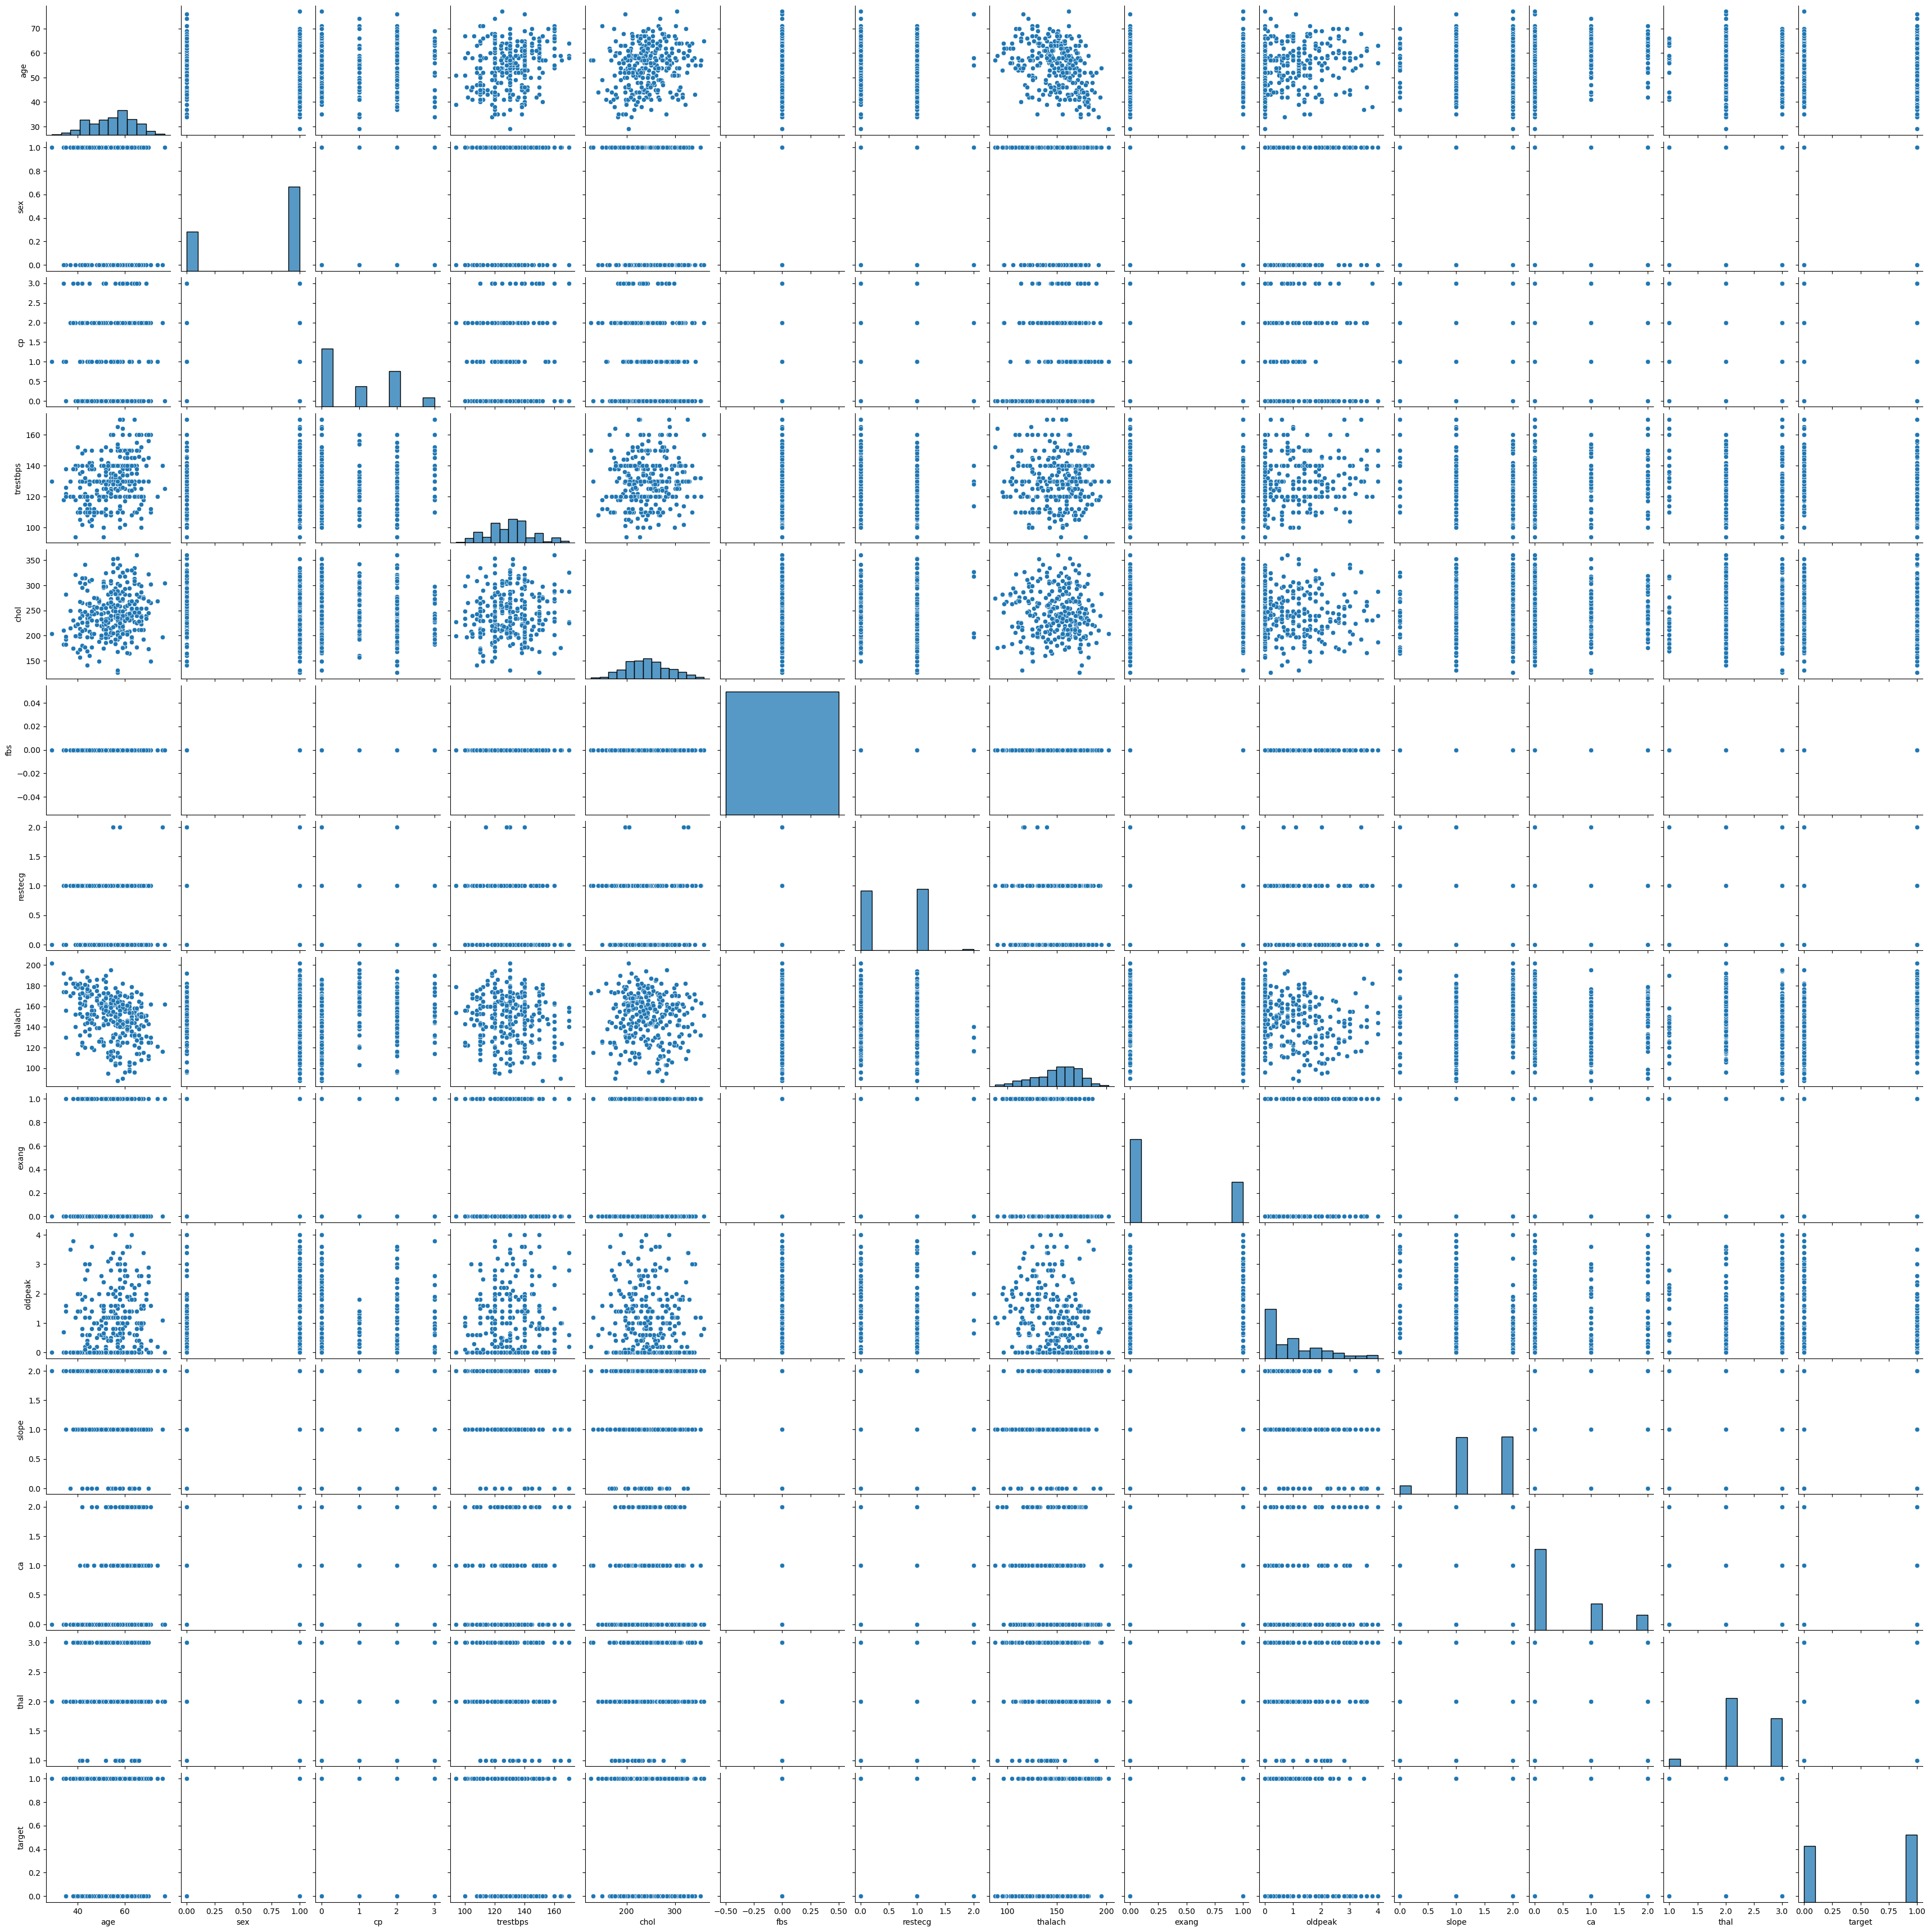

In [120]:
# as of we are having a dataset with many columns, you can use pair plots or subplots to visualize scatter plots for all variable combinations at once. 
sns.pairplot(df1)
plt.show()

Show relationships between two different numerical variables.

If the points form a straight-line trend → Linear Relationship

If the points form a curved pattern → Non-Linear Relationship

If the points are randomly scattered → No Relationship

In [125]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

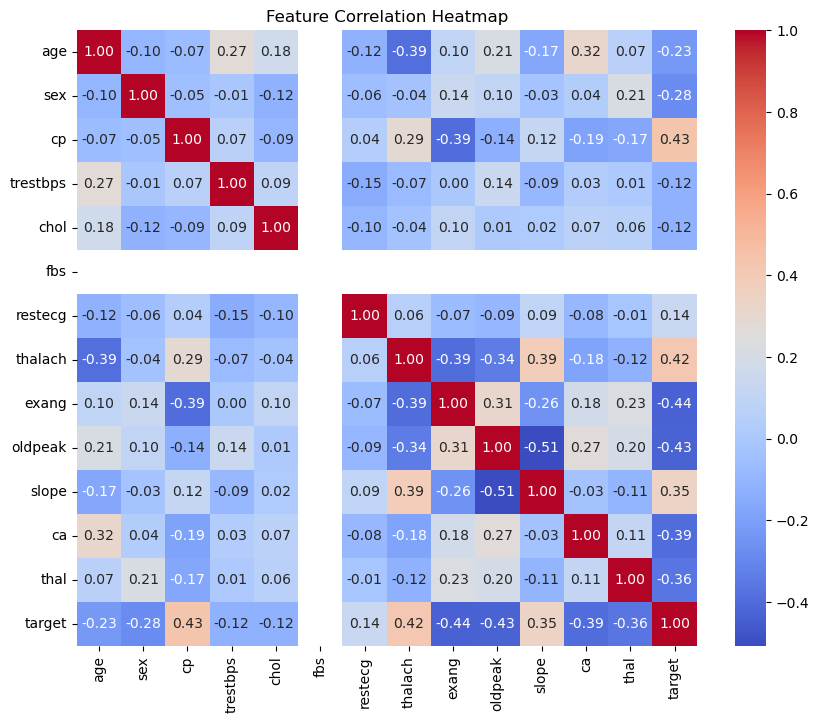

Highly correlated features that can be removed: set()
Approximate number of independent features: 14


In [143]:
# how many independent features are present in the given dataset ?

# Compute correlation matrix
corr_matrix = df1.corr()

# Display heatmap to visualize correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Find highly correlated features (threshold > 0.85)
high_corr_features = set()
threshold = 0.85
for col in corr_matrix.columns:
    for index in corr_matrix.index:
        if col != index and abs(corr_matrix.loc[col, index]) > threshold:
            high_corr_features.add(index)

print("Highly correlated features that can be removed:", high_corr_features)

# Number of independent features = Total features - Correlated features
num_independent_features = len(df1.columns) - len(high_corr_features)
print(f"Approximate number of independent features: {num_independent_features}")


In [145]:
print(len(df1.columns))
print(len(high_corr_features))

14
0


# 4. can we identify unwanted features?
so according to our dataset there is no unwanted features. 
there is no strong correlation between 2 features.

# 5. Perform the data discretization using equi frequncy ninnig method on age attributs.

This defines the number of bins (groups) into which the numerical data will be divided.
In equi-frequency binning, each bin will contain approximately the same number of data points.

Divides the column into num_bins groups of equal frequency.

Returns:
df1[f'{col}_bin']: A new column storing the bin labels (0, 1, 2, etc.) for each value.

bin_edges: The actual bin edges (thresholds used for binning).


In [178]:
num_bins = 3 

# Apply Equal-Frequency Binning
df1['age_bin'], bin_edges = pd.qcut(df1['age'], q=num_bins, retbins=True, labels=False)

print(df1)
print("\nBin Edges:", bin_edges)

     age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3     145.0  233.0  0.0        0    150.0      0      2.3   
1     37    1   2     130.0  250.0  0.0        1    187.0      0      3.5   
2     41    0   1     130.0  204.0  0.0        0    172.0      0      1.4   
3     56    1   1     120.0  236.0  0.0        1    178.0      0      0.8   
4     57    0   0     120.0  354.0  0.0        1    163.0      1      0.6   
..   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
298   57    0   0     140.0  241.0  0.0        1    123.0      1      0.2   
299   45    1   3     110.0  264.0  0.0        1    132.0      0      1.2   
300   68    1   0     144.0  193.0  0.0        1    141.0      0      3.4   
301   57    1   0     130.0  131.0  0.0        1    115.0      1      1.2   
302   57    0   1     130.0  236.0  0.0        0    174.0      0      0.0   

     slope   ca  thal  target  age_bin  cp_bin  trestbps_bin  chol_bin  \
0

The pd.qcut() function in pandas is used for quantile-based discretization (also called equi-frequency binning). It divides the data into bins with an equal number of observations.


# 6. Normalize "trestbps", "chol", and "thalach" attributes (considering above dataset) using min max normalization , z-score normalization, and decimal scalling normalization. 

In [167]:
import pandas as pd
import numpy as np

# Selecting Specific Columns for Normalization
df = df1[["trestbps", "chol", "thalach"]].copy()  # Create a new DataFrame with selected columns

# Min-Max Normalization
df_minmax = (df - df.min()) / (df.max() - df.min())

# Z-Score Normalization
df_zscore = (df - df.mean()) / df.std()

# Decimal Scaling Normalization
j_values = df.abs().max().apply(lambda x: len(str(int(x))))  # Find max j for each column
df_decimal_scaling = df / (10 ** j_values)

# Display Results
print("\n Min-Max Normalization:\n", df_minmax)
print("\n Z-Score Normalization:\n", df_zscore)
print("\n Decimal Scaling Normalization:\n", df_decimal_scaling)



 Min-Max Normalization:
      trestbps      chol   thalach
0    0.671053  0.457265  0.543860
1    0.473684  0.529915  0.868421
2    0.473684  0.333333  0.736842
3    0.342105  0.470085  0.789474
4    0.342105  0.974359  0.657895
..        ...       ...       ...
298  0.605263  0.491453  0.307018
299  0.210526  0.589744  0.385965
300  0.657895  0.286325  0.464912
301  0.473684  0.021368  0.236842
302  0.473684  0.470085  0.754386

[303 rows x 3 columns]

 Z-Score Normalization:
      trestbps      chol   thalach
0    0.985282 -0.223458  0.003675
1   -0.006108  0.156672  1.651575
2   -0.006108 -0.871916  0.983507
3   -0.667034 -0.156377  1.250734
4   -0.667034  2.482175  0.582667
..        ...       ...       ...
298  0.654819 -0.044574 -1.198847
299 -1.327961  0.469720 -0.798006
300  0.919190 -1.117883 -0.397166
301 -0.006108 -2.504240 -1.555150
302 -0.006108 -0.156377  1.072583

[303 rows x 3 columns]

 Decimal Scaling Normalization:
      trestbps   chol  thalach
0       0.145  0.233

Normalization ensured that different features are on a comparable scale.
→ Important for improving model accuracy and efficiency.

Normalization (Min-Max, Z-Score, Decimal Scaling)
What We Did:

 Applied Min-Max Normalization (scales values between 0 and 1).
 
 Used Z-Score Normalization (mean = 0, standard deviation = 1).
 
 Performed Decimal Scaling Normalization (scales based on the highest absolute value).

